/tmp/ipykernel_78/1965856270.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_78/1965856270.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_78/1965856270.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Statistical Summary:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.4366

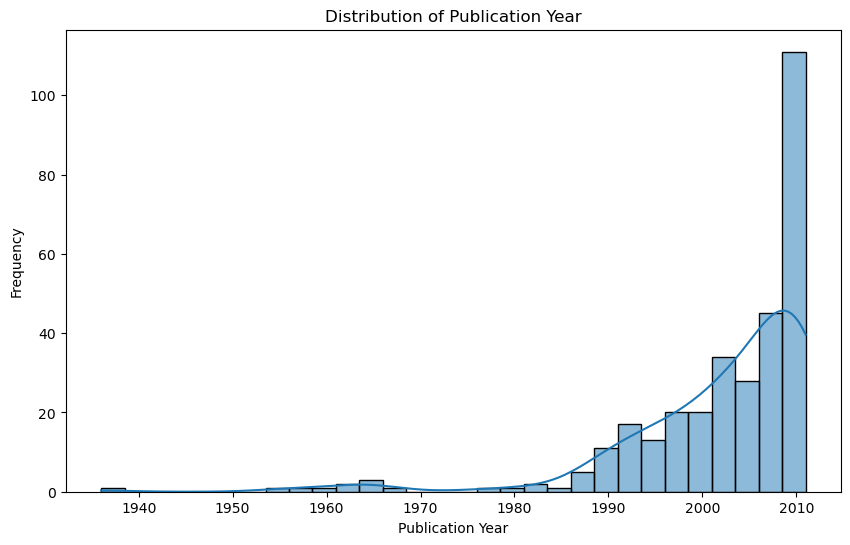

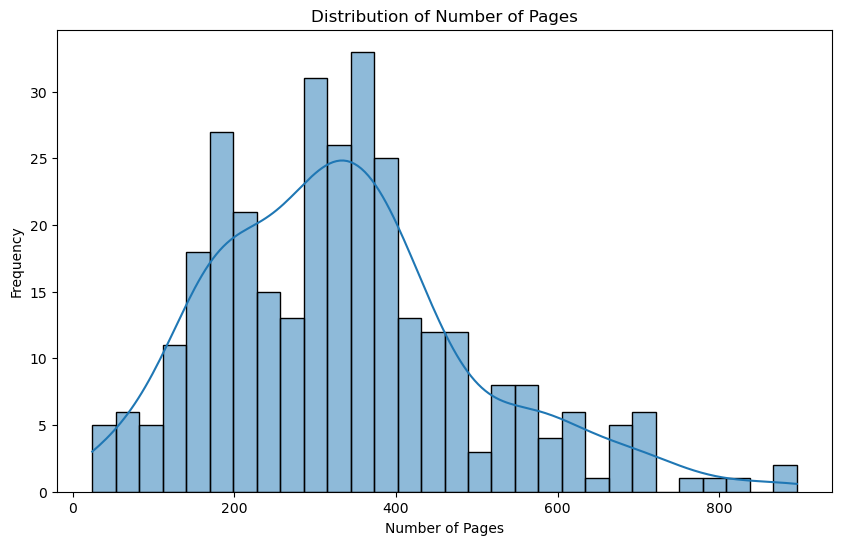

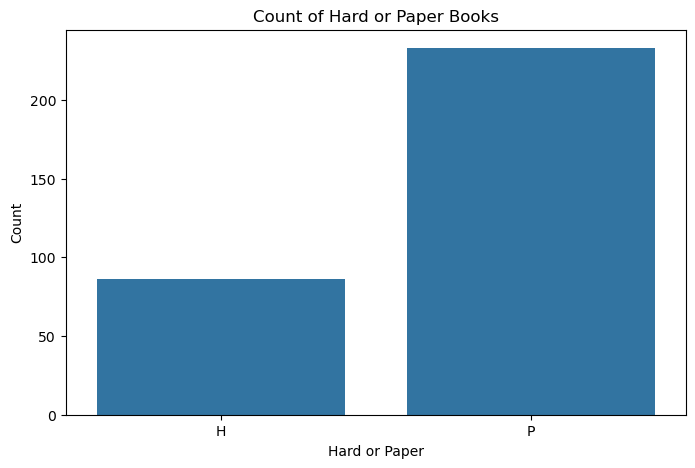

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove the columns 'Weight_oz', 'Width', and 'Height'
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop all rows with NaN (missing) values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert 'Pub year' and 'NumPages' to integer type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to a categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display basic information about the pre-processed dataset
print("Dataset Information:")
print(ab_reduced_noNaN.info())

# Display statistical summary of numerical columns
print("\nStatistical Summary:")
print(ab_reduced_noNaN.describe())

# Display value counts for the categorical column 'Hard_or_Paper'
print("\nValue Counts for 'Hard_or_Paper':")
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

# Display the first five rows of the pre-processed dataset
print("\nFirst Five Rows:")
print(ab_reduced_noNaN.head())

# Optional: Visualize the distribution of 'Pub year'
plt.figure(figsize=(10,6))
sns.histplot(ab_reduced_noNaN['Pub year'], bins=30, kde=True)
plt.title('Distribution of Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()

# Optional: Visualize the distribution of 'NumPages'
plt.figure(figsize=(10,6))
sns.histplot(ab_reduced_noNaN['NumPages'], bins=30, kde=True)
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

# Optional: Visualize the count of 'Hard_or_Paper' categories
plt.figure(figsize=(8,5))
sns.countplot(data=ab_reduced_noNaN, x='Hard_or_Paper')
plt.title('Count of Hard or Paper Books')
plt.xlabel('Hard or Paper')
plt.ylabel('Count')
plt.show()


Number of observations in training set: 255
Number of observations in testing set: 64


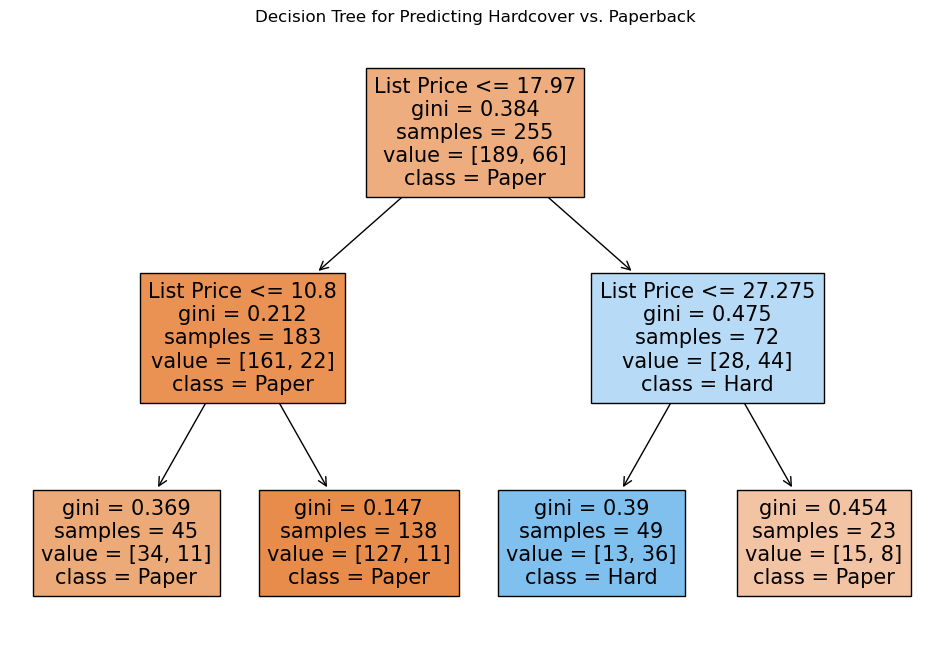

In [2]:
# Create an 80/20 split
#80% of the data as a training set *ab_reduced_noNaN_train* 
#20% of the data testing set  *ab_reduced_noNaN_test* 
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove the columns 'Weight_oz', 'Width', and 'Height'
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop all rows with NaN (missing) values
ab_reduced_noNaN = ab_reduced.dropna()

# Perform the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each dataset
print(f"Number of observations in training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in testing set: {len(ab_reduced_noNaN_test)}")

# Convert the dependent variable into binary: 'H' for hardcover
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Use the 'List Price' column as the predictor
X_train = ab_reduced_noNaN_train[['List Price']]
X_test = ab_reduced_noNaN_test[['List Price']]

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Visualize the fitted tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.title("Decision Tree for Predicting Hardcover vs. Paperback")
plt.show()



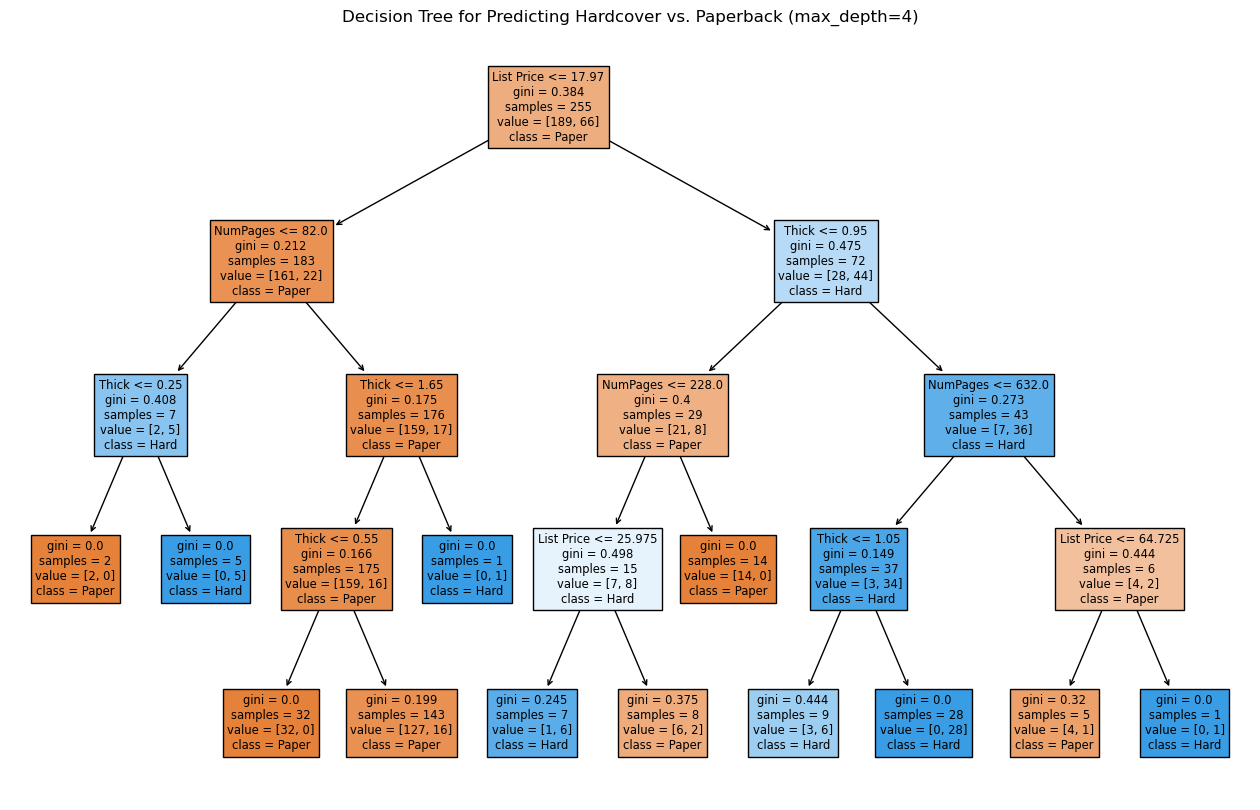

In [3]:
# Define the predictor variables (X) and the dependent variable (y)
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model to the training data
clf2.fit(X_train, y_train)

# Visualize the fitted tree
plt.figure(figsize=(16, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper', 'Hard'], filled=True)
plt.title("Decision Tree for Predicting Hardcover vs. Paperback (max_depth=4)")
plt.show()



The predicitons are made based on the value of each predictor variable sequentially, according to the decision rule it enounters at each node. For example, It's initially seperated by whether or not list price is lower than or equal to 17.97, If the list price is less than or equal to 17.97, the next decision is based on whther NumPages is smaller than or equal to 82. and then by different rules based on the results from this classification. The final classificiation prediction is given by the majority class in the leaf node it ends up in.

Note that: for our model, 'Hardcover'is cosidered positive and 'Paperback'is considered negative.


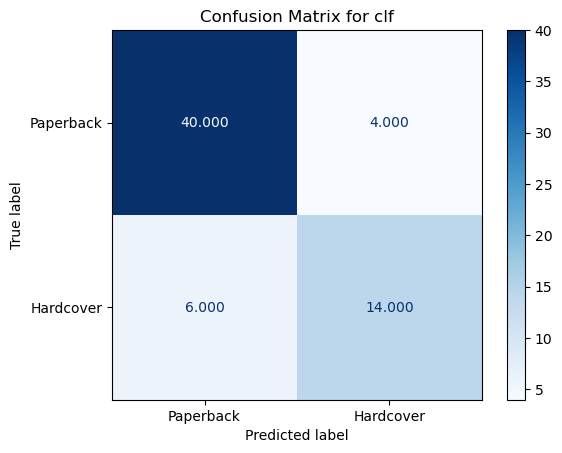

True Positives (TP): 14
False Positives (FP): 4
True Negatives (TN): 40
False Negatives (FN): 6
Sensitivity Calculation: TP / (TP + FN) = 14 / (14 + 6) = 0.7
Specificity Calculation: TN / (TN + FP) = 40 / (40 + 4) = 0.9090909090909091
Accuracy Calculation: (TP + TN) / (TP + TN + FP + FN) = (14 + 40) / (14 + 40 + 4 + 6) = 0.84375


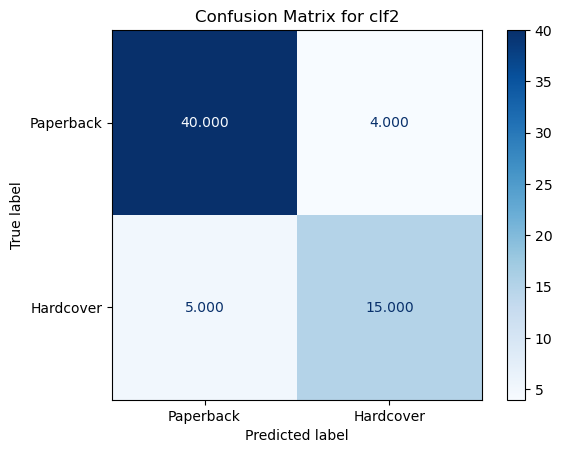

True Positives (TP): 15
False Positives (FP): 4
True Negatives (TN): 40
False Negatives (FN): 5
Sensitivity Calculation: TP / (TP + FN) = 15 / (15 + 5) = 0.75
Specificity Calculation: TN / (TN + FP) = 40 / (40 + 4) = 0.9090909090909091
Accuracy Calculation: (TP + TN) / (TP + TN + FP + FN) = (15 + 40) / (15 + 40 + 4 + 5) = 0.859375


In [4]:
print("Note that: for our model, 'Hardcover'is cosidered positive and 'Paperback'is considered negative.")
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Predict using clf and clf2
y_test_pred_clf = clf.predict(X_test[['List Price']])
y_test_pred_clf2 = clf2.predict(X_test)

# Calculate confusion matrices for clf and clf2
conf_matrix_clf = confusion_matrix(y_test, y_test_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_test_pred_clf2)

# Define a function to calculate Sensitivity, Specificity, and Accuracy with detailed process
def evaluate_model_verbose(conf_matrix, model_name):
    # Extract True Positives, False Positives, True Negatives, and False Negatives
    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    TN = conf_matrix[0, 0]
    FN = conf_matrix[1, 0]
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
    
    
    # Sensitivity (Recall for Positive Class)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    print(f"Sensitivity Calculation: TP / (TP + FN) = {TP} / ({TP} + {FN}) = {sensitivity}")
    
    # Specificity (Recall for Negative Class)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    print(f"Specificity Calculation: TN / (TN + FP) = {TN} / ({TN} + {FP}) = {specificity}")
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    print(f"Accuracy Calculation: (TP + TN) / (TP + TN + FP + FN) = ({TP} + {TN}) / ({TP} + {TN} + {FP} + {FN}) = {accuracy}")
    
    return {
        'Sensitivity': np.round(sensitivity, 3),
        'Specificity': np.round(specificity, 3),
        'Accuracy': np.round(accuracy, 3)
    }


# Visualize confusion matrices
# Visualize clf confusion matrix
disp_clf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues', values_format='.3f')
plt.title("Confusion Matrix for clf")
plt.show()

metrics_clf = evaluate_model_verbose(conf_matrix_clf, "clf (List Price Only)")

# Visualize clf2 confusion matrix
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues', values_format='.3f')
plt.title("Confusion Matrix for clf2")
plt.show()

metrics_clf2 = evaluate_model_verbose(conf_matrix_clf2, "clf2 (NumPages, Thick, List Price)")


### Differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```

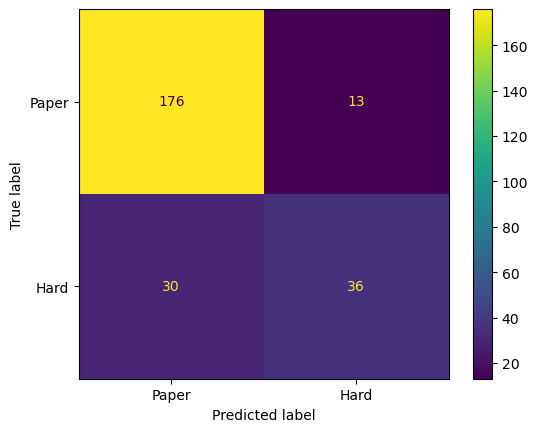

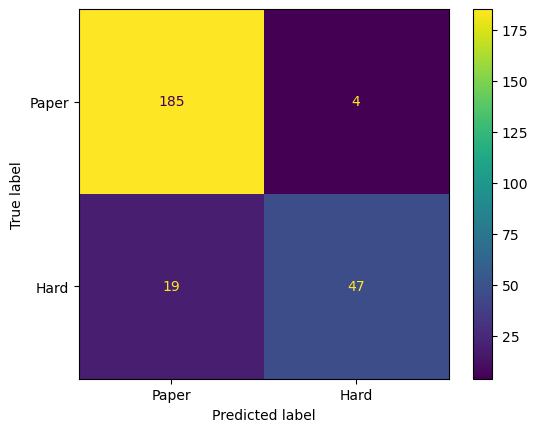

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion matrix for clf (using List Price as predictor)
ConfusionMatrixDisplay(
    confusion_matrix(
        y_train,  # Replace with your own outcome variable
        clf.predict(ab_reduced_noNaN_train[['List Price']]),  # Predictions based on List Price
        labels=[0, 1]
    ),
    display_labels=["Paper", "Hard"]
).plot()

# Confusion matrix for clf2 (using NumPages, Thick, and List Price as predictors)

ConfusionMatrixDisplay(
    confusion_matrix(
        y_train,  # Replace with your own outcome variable
        clf2.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]),  # Predictions based on multiple predictors
        labels=[0, 1]
    ),
    display_labels=["Paper", "Hard"]
).plot()

The difference is that one matrix is based on the model that only uses one predictor variable of 'List Price', while the the other one visualizes the predictive performance when using three predictor variables: 'NumPages', 'Thick', 'List Price'. 

This resulted in higher accuracy, sensitivity and specifity as it was able to catch more meaningful patterns in the data. 

The two matrices above in question 6 are better because they used the testing set, which evaluates the models' predictive performance on unseen data and relfelcts the models' generalizability, while the two matrices here based on training data might overestimate the models' real-world performance due to overfitting.

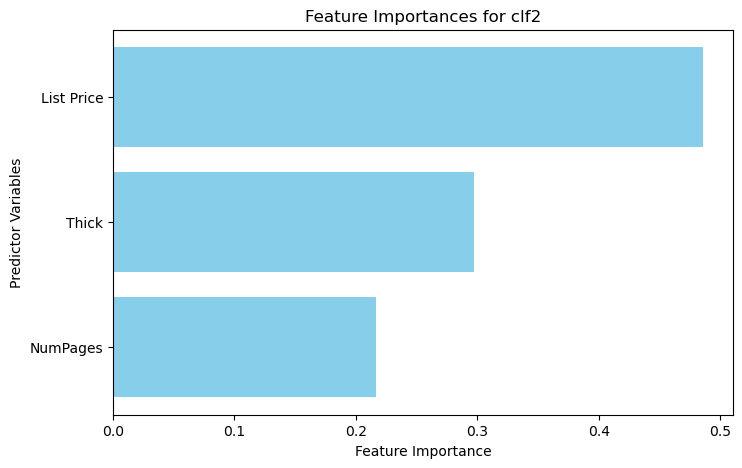

[0.21653658 0.29748977 0.48597366]
['NumPages' 'Thick' 'List Price']
The most important predictor variable for clf2 is 'List Price'.


In [7]:
# Visualize feature importances for clf2
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot of feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Predictor Variables")
plt.title("Feature Importances for clf2")
plt.show()

# Report the most important feature
most_important_feature_index = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_feature_index]
print(clf2.feature_importances_)
print(clf2.feature_names_in_)
print(f"The most important predictor variable for clf2 is '{most_important_feature}'.")


### Differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

Coefficients in linear model regression represent the change in the value of the numerical outcome variable for every one-unit increase in the predictor variable, reflecting both the magnitude and the direction of the relationship. The feature importances, on the other hand, quantify the relative contribution of each predictor variable to the reduction in impurity of the classifications and consider both the magnitude of impurity reduction achieved by the predictor at each node and how frequently it is used in the nodes. However, feature importances do not show the direction in which the predictor affects the outcome.